In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv('C:\\Users\\Dell\\Downloads\\dataset\\Ads_CTR_Optimisation.csv')

In [6]:
#Implementing the UCB
import math
N =  10000 # Total number of rounds showing ads to the users (assuming)
d = 10 # no. of ads in the given dataset, in dataset we have 10 columns so d = 10
ads_selected = []
numbers_of_selections = [0] * d   # no of selecting the ads
sum_of_rewards = [0] *d
total_rewards = 0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i] )
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # max of value
            if ( upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n , ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_rewards = total_rewards + reward
    
    
                

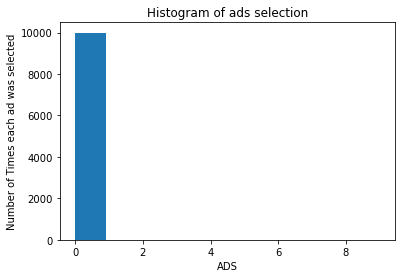

In [7]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('ADS')
plt.ylabel('Number of Times each ad was selected')
plt.show()